# Convolution

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## 1D case
### $h[i] = \sum_{j} \mathcal{K}[j] \; f[i-j]$
![gif](1DConvolution.gif) \
Ref: https://e2eml.school/convolution_one_d.html

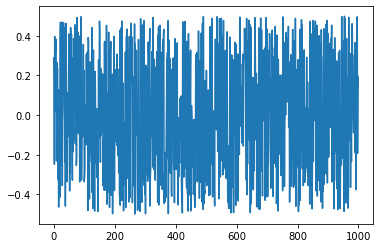

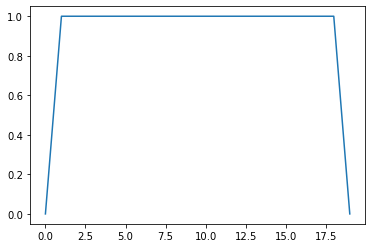

In [3]:
NumberGridPoints = 1000
KernelSize = 20

f = 0.5 - np.random.rand( NumberGridPoints )

Kernel = np.ones( KernelSize )
# Kernel[5:15] = -1
Kernel[0] = 0
Kernel[-1] = 0

plt.plot(f)
plt.show()

plt.plot(Kernel)
plt.show()

## Convolution operation

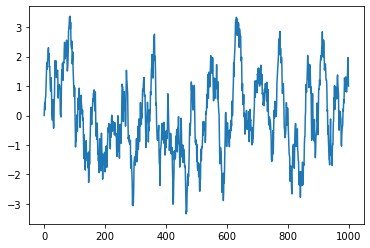

In [4]:
h = np.zeros( NumberGridPoints )

for i in range(NumberGridPoints):
    for j in range(KernelSize):
        if ((i-j)>=0) and ((i-j)<NumberGridPoints) :
            h[i] = h[i] + Kernel[j] * f[i-j]

plt.plot(h)
plt.show()

# Learning to estimate the Kernel from input and convolved data

### If $\tilde{\mathcal{K}}$ is the estimated kernel, then the estimated output is
### $g[i] = \sum_{j} \tilde{\mathcal{K}}[j] \; f[i-j]$
### then the error in the $i^{th}$ grid point is
### $\mathcal{E}[i] := (g[i] - h[i])^2$
### Now, the estimated kernel update is performed as the error gradient descent in
### $\tilde{\mathcal{K}}[j] \rightarrow \tilde{\mathcal{K}}[j] - \eta \; \frac{\partial \mathcal{E}[i]}{\partial \tilde{\mathcal{K}}[j]}$
### $ \;\; = \tilde{\mathcal{K}}[j] - \eta \;2 (g[i]-h[i]) \; f[i-j]$ 

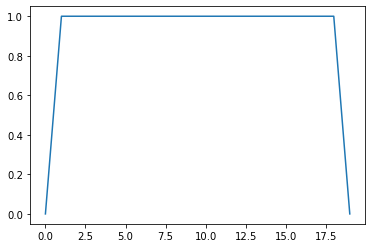

In [7]:
MaxEpochs = 10000
LearningRate = 0.01

EstimatedKernel = np.zeros( KernelSize )

for EpochNumber in range( MaxEpochs ):
    i = int( np.floor( NumberGridPoints * np.random.rand(1)) )
    g = 0
    
    for j in range( KernelSize ):
        if ((i-j)>=0) and ((i-j)<NumberGridPoints) :
            g = g + EstimatedKernel[j] * f[i-j]

    for j in range( KernelSize ):
        if ((i-j)>=0) and ((i-j)<NumberGridPoints) :
            EstimatedKernel[j] = EstimatedKernel[j] - LearningRate * 2 * (g-h[i]) * f[i-j]

plt.plot( EstimatedKernel )
plt.show()